### Load test error

In [1]:
exp='mnist'
time_stamp = "05-15-18-17-37-07"
models =["LSTM","MLSTM","TLSTM"] #'phased_lstm']#
hz_list= [16]
ts_list =[10,20,30] 
lr_list =[2,3,4]



import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(ts, model, lr):    
    data_path = "../log/"+exp+"/"+time_stamp+"/"+model+"/"+ "ts-"+ str(ts) +"/"+ "lr-1e-"+ str(lr) +"/"
    f_pred= "predict.npy"
    f_err = "config.out"
    try:
        pred =  np.load(data_path+f_pred )
        with open(data_path+""+f_err,'r') as fstream:
            config = read_config(fstream)
        print(data_path)
        return config, pred
    except FileNotFoundError:
        return None, None

errs = np.ones((len(ts_list),len(models), 2))
i=0
for ts in ts_list:
    j=0
    for model in models: 
        k =0 
        for lr in lr_list:
            try:
                config, pred = load_log(ts, model, lr)
                print('train error:',config['train_error'],'valid err:',config['valid_error'],'test err:',config['test_error'])
                errs[i,j,k] =  config['test_error']
            except:
                pass
            k +=1
        j +=1
    i +=1

../log/mnist/05-15-18-17-37-07/LSTM/ts-10/lr-1e-2/
train error: 0.20784 valid err: 0.249371 test err: 0.215862
../log/mnist/05-15-18-17-37-07/LSTM/ts-10/lr-1e-3/
train error: 0.199833 valid err: 0.247506 test err: 0.225687
../log/mnist/05-15-18-17-37-07/LSTM/ts-10/lr-1e-4/
train error: 0.232046 valid err: 0.279941 test err: 0.257944
../log/mnist/05-15-18-17-37-07/TLSTM/ts-10/lr-1e-2/
train error: 0.169164 valid err: 0.26148 test err: 0.268446
../log/mnist/05-15-18-17-37-07/TLSTM/ts-10/lr-1e-3/
train error: 0.202132 valid err: 0.240293 test err: 0.228395
../log/mnist/05-15-18-17-37-07/TLSTM/ts-10/lr-1e-4/
train error: 0.191305 valid err: 0.281459 test err: 0.261906
../log/mnist/05-15-18-17-37-07/LSTM/ts-20/lr-1e-2/
train error: 0.1817 valid err: 0.232587 test err: 0.224477
../log/mnist/05-15-18-17-37-07/LSTM/ts-20/lr-1e-3/
train error: 0.137627 valid err: 0.235398 test err: 0.219033
../log/mnist/05-15-18-17-37-07/LSTM/ts-20/lr-1e-4/
train error: 0.224799 valid err: 0.276916 test err: 0.

## Load test true/pred

In [51]:
def get_pred(ts, model, lr):
    data_path = "../log/"+exp+"/"+time_stamp+"/"+model+"/"+ "ts-"+ str(ts) +"/"+"lr-1e-"+ str(lr) +"/"
    try:
        true, pred = np.load(data_path+'predict.npy')
        print(data_path)
    except:
        pass
    return true,pred

tlstm_true, tlstm_pred = get_pred(30,'TLSTM',3)
print(tlstm_true.shape)

../log/mnist/05-15-18-17-37-07/TLSTM/ts-30/lr-1e-3/
(80, 30, 1024)


## Display image

In [52]:
import matplotlib.pyplot as plt
from six.moves import xrange 
%matplotlib inline
def draw_seq(data, image_size, case_id=0, fig=1):
    data = data[case_id, :].reshape(-1, image_size, image_size)
    seq_length = data.shape[0]
    num_rows = 1

    plt.figure(2*fig, figsize=(30, 1))
    plt.clf()
    for i in xrange(seq_length):
        plt.subplot(num_rows,seq_length, i+1)
        plt.imshow(data[i, :, :], cmap=plt.cm.gray, interpolation="nearest")
        plt.axis('off')
    plt.draw()
    
image_size = 32

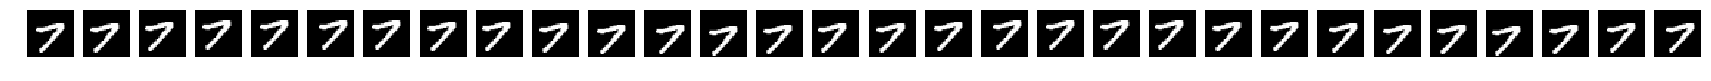

In [53]:
draw_seq(tlstm_true, image_size)

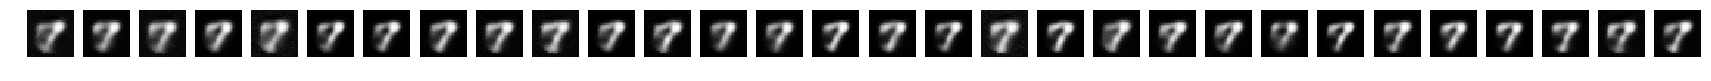

In [54]:
draw_seq(tlstm_pred, image_size)